# Data Science Approach to Predictive Policing in Memphis
By Shristi Shrestha

## Background

This project is an attempt to apply data science approaches to derive insights from [Memphis Police Department Public Safety Dataset](https://data.memphistn.gov/Public-Safety/Memphis-Police-Department-Public-Safety-Incidents/puh4-eea4/about_data) such that it can help MPD to strategically deploy the law enforcement resources.

Below are the questions that will be answered in this project along with charts that can help represent some insights:

__Questions:__
* Which geographic areas in Memphis have the highest crime rates?
* Would it be possible to discover any difference in crime pattern based on time or day?
* Have the crime rates evolved or changed over the years?
* Is there a relationship between the distance from the downtown and crime frequency/types?
* What are the important factors that contribute to the crime type?
* Is it possible to accurately predict the likelihood of specific crime types occurring in certain areas?

__Charts:__
* Charts similar to line graph to show trend of crime types over the years
* Confusion matrix to show the ML model performance

## Dataset

CSV file named as *Memphis_Police_Department__Public_Safety_Incidents_20241110.csv* has been exported which contains the data until Nov 10th 2024 from MPD Public Safety Dataset website. 

Each row in the file is a record taken by a Memphis Police Officer which may contain human error or false information provided by suspects and witnesses. 

### Data Dictionary
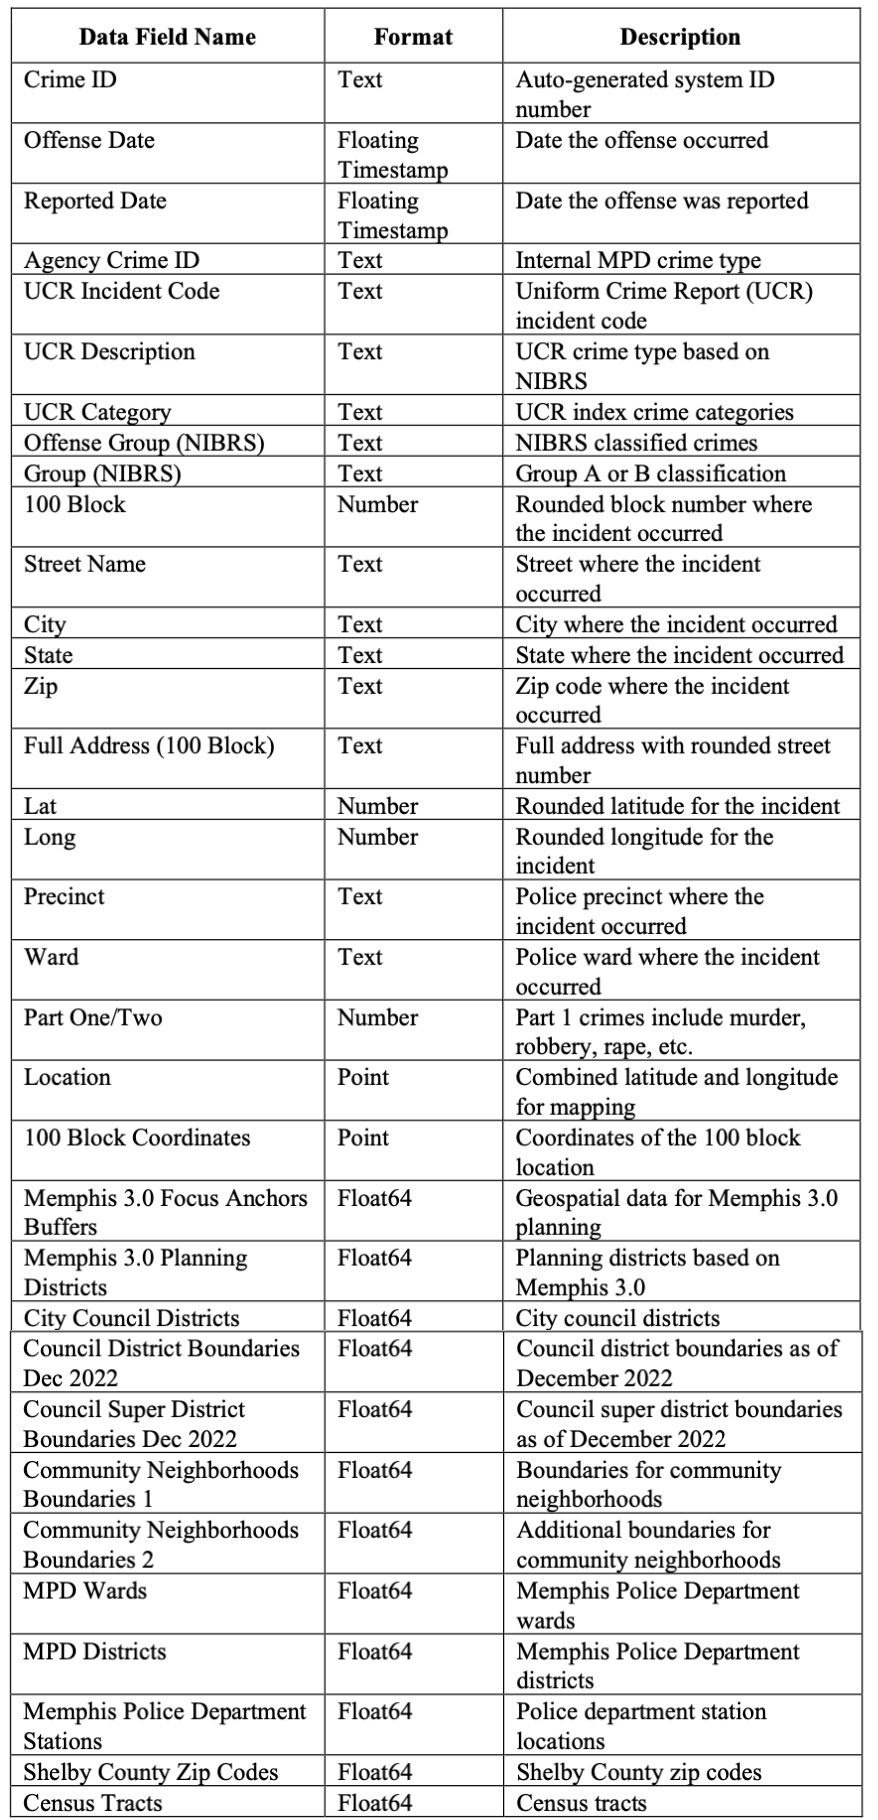


# Design

The data must adhere to a robust data life cycle to ensure that the analysis and predictions are reliable and accurate. The following process will be involved:

1. **Understand the Data**: Load the relevant table from the dataset.
2. **Data Cleaning**: Clean the data by handling missing or duplicate values.
3. **Exploratory Data Analysis (EDA)**: Conduct EDA to gain a deeper understanding of the data.
4. **Feature Engineering**: Create derived columns to enhance model inputs and capture critical relationships.
5. **Data Preparation**: Prepare the data for machine learning by transforming and scaling it as necessary.
6. **Model Exploration**: Identify and explore machine learning models that meet the project's requirements.
7. **Result Analysis**: Analyze the model's results to draw meaningful insights.

This structured approach ensures that the analysis and predictions are both reliable and accurate.

# Understand the data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('Memphis_Police_Department__Public_Safety_Incidents_20241110.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Memphis_Police_Department__Public_Safety_Incidents_20241110.csv'

In [ ]:
data.describe()

,100 Block,Lat,Long,Part One/Two,Memphis 3.0 Focus Anchors Buffers,Memphis 3.0 Planning Districts,City Council Districts,Council District Boundaries Dec 2022,Council Super District Boundaries Dec 2022,Community Neighborhoods Boundaries 1,Community Neighborhoods Boundaries 2,MPD Wards,MPD Districts,Memphis Police Department Stations,Shelby County Zip Codes,Census Tracts
count,638470.000000,626571.000000,626578.000000,640224.000000,23164.000000,609347.000000,611642.000000,609219.000000,609219.000000,316821.000000,89773.00000,611193.000000,611193.000000,611193.000000,625056.000000,638705.000000
mean,2913.491472,35.111945,-89.947224,1.476619,3.351580,7.924340,4.119812,4.178579,1.404630,9.652656,2.98279,26.306240,1.539610,5.163348,15.336802,111.871844
std,1921.494505,0.062544,0.093086,0.499453,2.029897,3.923067,1.860997,1.856814,0.490821,7.809899,2.29770,16.029347,0.498429,2.582080,7.955172,57.571175
min,0.000000,34.850000,-90.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1300.000000,35.060000,-90.010000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,1.00000,11.000000,1.000000,3.000000,9.000000,65.000000
50%,2800.000000,35.110000,-89.960000,1.000000,4.000000,8.000000,4.000000,4.000000,1.000000,7.000000,1.00000,27.000000,2.000000,5.000000,15.000000,104.000000
75%,4100.000000,35.160000,-89.890000,2.000000,5.000000,11.000000,6.000000,6.000000,2.000000,20.000000,4.00000,40.000000,2.000000,8.000000,21.000000,164.000000
max,12300.000000,36.140000,-81.590000,2.000000,6.000000,14.000000,7.000000,7.000000,2.000000,22.000000,7.00000,54.000000,2.000000,9.000000,37.000000,209.000000


In [ ]:
data.dtypes

Crime ID                                       object
Offense Date                                   object
Reported Date                                  object
Agency Crime ID                                object
UCR Incident Code                              object
UCR Description                                object
UCR Category                                   object
Offense Group (NIBRS)                          object
Group (NIBRS)                                  object
100 Block                                     float64
Street Name                                    object
City                                           object
State                                          object
Zip                                            object
Full Address (100 Block)                       object
Lat                                           float64
Long                                          float64
Precinct                                       object
Ward                        

In [ ]:
data.head(10)

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,City Council Districts,Council District Boundaries Dec 2022,Council Super District Boundaries Dec 2022,Community Neighborhoods Boundaries 1,Community Neighborhoods Boundaries 2,MPD Wards,MPD Districts,Memphis Police Department Stations,Shelby County Zip Codes,Census Tracts
0,1803013551ME,03/26/2018 09:50:00 PM,03/26/2018 11:34:00 PM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1802012717ME,02/25/2018 08:00:00 PM,02/25/2018 08:35:00 PM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,1800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
2,1807015741ME,07/30/2018 10:45:00 AM,07/30/2018 11:13:00 AM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,4800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0
3,1809000561ME,08/20/2018 12:00:00 AM,09/02/2018 10:34:00 AM,THEFT FROM BUILDING,23D,THEFT FROM A BUILDING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4,1809010477ME,09/20/2018 04:00:00 PM,09/20/2018 05:01:00 PM,INTIMIDATION/DV,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,3100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
5,1810004858ME,10/09/2018 04:00:00 PM,10/09/2018 05:02:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0
6,1808001353ME,08/02/2018 10:00:00 AM,08/03/2018 01:06:00 PM,CREDIT CARD/ATM FRAUD,26B,CREDIT CARD/ATM FRAUD,FRAUD,CRIMES AGAINST PROPERTY,A,2600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
7,1809011728ME,09/23/2018 05:25:00 AM,09/23/2018 05:48:00 AM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0
8,1809011924ME,09/23/2018 05:24:00 PM,09/23/2018 06:05:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0
9,1809012007ME,09/23/2018 10:00:00 PM,09/23/2018 11:09:00 PM,SIMPLE ASSAULT/DV,13B,SIMPLE ASSAULT,ASSAULT,CRIMES AGAINST PERSONS,A,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0


# Data Cleaning



In [ ]:
data.isnull().sum()

Crime ID                                           0
Offense Date                                       0
Reported Date                                      0
Agency Crime ID                                    3
UCR Incident Code                                  0
UCR Description                                    2
UCR Category                                       2
Offense Group (NIBRS)                              2
Group (NIBRS)                                      2
100 Block                                       1756
Street Name                                       11
City                                             136
State                                              0
Zip                                              137
Full Address (100 Block)                           0
Lat                                            13655
Long                                           13648
Precinct                                        1292
Ward                                          

Before cleaning column-level data, removing the columns that are not found in the data dictionary and also has a lot of missing values.

In [ ]:
columns_to_remove = [
    "Memphis 3.0 Focus Anchors Buffers",
    "Memphis 3.0 Planning Districts",
    "City Council Districts",
    "Council District Boundaries Dec 2022",
    "Council Super District Boundaries Dec 2022",
    "Community Neighborhoods Boundaries 1",
    "Community Neighborhoods Boundaries 2",
    "MPD Wards",
    "MPD Districts",
    "Memphis Police Department Stations",
    "Shelby County Zip Codes",
    "Census Tracts"
]

# Remove the columns
data = data.drop(columns=columns_to_remove)
data.isnull().sum()

Crime ID                        0
Offense Date                    0
Reported Date                   0
Agency Crime ID                 3
UCR Incident Code               0
UCR Description                 2
UCR Category                    2
Offense Group (NIBRS)           2
Group (NIBRS)                   2
100 Block                    1756
Street Name                    11
City                          136
State                           0
Zip                           137
Full Address (100 Block)        0
Lat                         13655
Long                        13648
Precinct                     1292
Ward                         1292
Part One/Two                    2
Location                    13656
100 Block_Coordinates           0
dtype: int64

In [ ]:
# Removing rows with NaN values in  'UCR Category', 'Group (NIBRS)', 'Agency Crime ID' as there are only a few records missing for this.
data = data.dropna(subset=['UCR Category', 'Group (NIBRS)', 'Agency Crime ID'])
data.isnull().sum()

Crime ID                        0
Offense Date                    0
Reported Date                   0
Agency Crime ID                 0
UCR Incident Code               0
UCR Description                 0
UCR Category                    0
Offense Group (NIBRS)           0
Group (NIBRS)                   0
100 Block                    1756
Street Name                    11
City                          136
State                           0
Zip                           137
Full Address (100 Block)        0
Lat                         13655
Long                        13648
Precinct                     1292
Ward                         1292
Part One/Two                    0
Location                    13656
100 Block_Coordinates           0
dtype: int64

Since, this dataset is for Memphis Metro Area which lies in TN-AR-MS region, the state should be only those. Following step would involve cleaning the State data.

In [ ]:
data['State'].value_counts()

State
TN    640201
CA         6
MS         3
AB         2
TX         1
GA         1
NC         1
VA         1
IL         1
NB         1
FL         1
AL         1
SD         1
SC         1
AR         1
Name: count, dtype: int64

In [ ]:
memphis_metro_data = data[data['State'].isin(['TN', 'AR', 'MS'])]
memphis_metro_data['State'].value_counts()

State
TN    640201
MS         3
AR         1
Name: count, dtype: int64

Now, cleaning City column and checking if there are any cities outside of Memphis Metro.

In [ ]:
non_tn_data = memphis_metro_data[memphis_metro_data['State'] != 'TN']
non_tn_data['City'].value_counts()

City
SARDIS       1
SOUTHAVEN    1
PONTOTOC     1
CAMDEN       1
Name: count, dtype: int64

In [ ]:
cities_to_remove = ['SARDIS', 'PONTOTOC', 'CAMDEN']
data = memphis_metro_data[~memphis_metro_data['City'].isin(cities_to_remove)]
data['State'].value_counts()

State
TN    640201
MS         1
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

Crime ID                        0
Offense Date                    0
Reported Date                   0
Agency Crime ID                 0
UCR Incident Code               0
UCR Description                 0
UCR Category                    0
Offense Group (NIBRS)           0
Group (NIBRS)                   0
100 Block                    1756
Street Name                    11
City                          136
State                           0
Zip                           137
Full Address (100 Block)        0
Lat                         13644
Long                        13637
Precinct                     1276
Ward                         1276
Part One/Two                    0
Location                    13645
100 Block_Coordinates           0
dtype: int64

Now, checking Lat, Long, and Location data which have the most number of NaNs.

In [ ]:
data[['100 Block_Coordinates', 'Lat', 'Long',  'Location']]

,100 Block_Coordinates,Lat,Long,Location
0,POINT (-89.99749 34.84118),NaN,NaN,NaN
1,POINT (-89.97016 35.09596),NaN,NaN,NaN
2,POINT (-90.06969 35.0162),NaN,NaN,NaN
3,POINT (-89.94506 35.24023),NaN,NaN,NaN
4,POINT (-89.95705 35.16089),NaN,NaN,NaN
...,...,...,...,...
640221,POINT (-89.98637 35.16572),35.16,-89.98,POINT (-89.98 35.16)
640222,POINT (-90.03623 35.16269),35.13,-90.03,POINT (-90.03 35.13)
640223,POINT (-90.03638 35.08414),35.08,-90.03,POINT (-90.03 35.08)
640224,POINT (-89.96454 35.13941),35.13,-89.96,POINT (-89.96 35.13)


It can be observed that *100 Block_Coordinates* has no missing values while *Lat*, *Long*, and *Location* have NaN. However, they have the same information so, filling out the missing values using *100 Block_Coordinates*. 

In [ ]:
#  Extract Lat and Long from data['100 Block_Coordinates'] and load them into Lat and Long if Lat and Long is NaN. This also fills Location if NaN as POINT(Long Lat)

# Function to extract lat and long from coordinates
def extract_lat_long(coords_str):
  if isinstance(coords_str, str):
    try:
      coords_str = coords_str.replace('POINT (', '').replace(')', '')
      long, lat = map(float, coords_str.split())
      return lat, long
    except:
      return np.nan, np.nan
  else:
    return np.nan, np.nan

# Apply the function to extract lat and long
data[['extracted_lat', 'extracted_long']] = data['100 Block_Coordinates'].apply(lambda x: pd.Series(extract_lat_long(x)))

# Fill NaN values in Lat and Long with extracted values
data['Lat'] = data['Lat'].fillna(data['extracted_lat'])
data['Long'] = data['Long'].fillna(data['extracted_long'])

# Fill NaN values in Location with POINT(Long Lat)
data['Location'] = data.apply(lambda row: 'POINT ({:.6f} {:.6f})'.format(row['Long'], row['Lat'])
                              if pd.isnull(row['Location'])
                              else row['Location'], axis=1)

# Remove temporary columns
data = data.drop(['extracted_lat', 'extracted_long'], axis=1)

data[['100 Block_Coordinates', 'Lat', 'Long', 'Location']]

,100 Block_Coordinates,Lat,Long,Location
0,POINT (-89.99749 34.84118),34.84118,-89.99749,POINT (-89.997490 34.841180)
1,POINT (-89.97016 35.09596),35.09596,-89.97016,POINT (-89.970160 35.095960)
2,POINT (-90.06969 35.0162),35.01620,-90.06969,POINT (-90.069690 35.016200)
3,POINT (-89.94506 35.24023),35.24023,-89.94506,POINT (-89.945060 35.240230)
4,POINT (-89.95705 35.16089),35.16089,-89.95705,POINT (-89.957050 35.160890)
...,...,...,...,...
640221,POINT (-89.98637 35.16572),35.16000,-89.98000,POINT (-89.98 35.16)
640222,POINT (-90.03623 35.16269),35.13000,-90.03000,POINT (-90.03 35.13)
640223,POINT (-90.03638 35.08414),35.08000,-90.03000,POINT (-90.03 35.08)
640224,POINT (-89.96454 35.13941),35.13000,-89.96000,POINT (-89.96 35.13)


In [ ]:
data.isnull().sum()

Crime ID                       0
Offense Date                   0
Reported Date                  0
Agency Crime ID                0
UCR Incident Code              0
UCR Description                0
UCR Category                   0
Offense Group (NIBRS)          0
Group (NIBRS)                  0
100 Block                   1756
Street Name                   11
City                         136
State                          0
Zip                          137
Full Address (100 Block)       0
Lat                            0
Long                           0
Precinct                    1276
Ward                        1276
Part One/Two                   0
Location                       0
100 Block_Coordinates          0
dtype: int64

The next field is zip. According to https://www.memphisrealtysearch.com/memphis-zip-codes/, Memphis Zip codes should start from 38. In the next steps, zip code data will be cleaned by correcting the first two numbers to 38.

In [ ]:
data['Zip'].unique()

array(['38106', '38115', '38109', '38128', '38112', '38127', '38114',
       '38149', '38117', '38134', '38111', '38104', '38105', '38122',
       '38107', '38118', '38116', '38126', '31828', '38141', '38108',
       '38103', '38016', '38125', '38119', '38133', '38018', '38120',
       '31833', '38010', '38101', '38132', '38404', '28127', '38124',
       '38102', '12322', '30107', '38012', '39117', '38060', '38110',
       '38127-', '30120', '39112', '38138', '30104', '38017', '38135',
       '38002', '38015', '38137', '38155', '38011', '38148', '38022',
       '38218', '38019', '30106', '30109', '39016', '30134', '38131',
       '38152', '38109-5146', '38122-0000', '38118-', '39115', '38013',
       '38014', '38157', '38146', '38818', '35016', '30103', '30116',
       '38186', '38116-', '38088', '38000', '31806', '38113', '38122-',
       '38217', '68125', '30115', '33122', '32127', '38147', '30127',
       '38150', '37114', '23127', '38144', '38815', '38104-',
       '38016-3753', '6

In [ ]:
data[data['Zip'] == '31111']

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,State,Zip,Full Address (100 Block),Lat,Long,Precinct,Ward,Part One/Two,Location,100 Block_Coordinates
493520,2305032532ME,05/27/2023 07:00:00 PM,05/28/2023 06:20:00 PM,MVT/PASSENGER VEHICLE,240,MOTOR VEHICLE THEFT,MOTOR VEHICLE THEFT,CRIMES AGAINST PROPERTY,A,1400.0,...,TN,31111,1400 PINECREST DR MEMPHIS TN 31111,35.08,-89.95,AIRWAYS,726,1.0,POINT (-89.95 35.08),POINT (-89.95244 35.0894)
584829,2405021715ME,05/05/2024 03:40:00 AM,05/05/2024 04:09:00 AM,ARSON,200,ARSON,ARSON,CRIMES AGAINST PROPERTY,A,4200.0,...,TN,31111,4200 MALLORY AVE MEMPHIS TN 31111,35.08,-89.92,MT MORIAH,323,1.0,POINT (-89.92 35.08),POINT (-89.92213 35.0829)


For example, this address: 1400 PINECREST DR MEMPHIS TN 31111 isn't valid as the zip code is not correct. When searching that in google https://www.google.com/search?client=safari&rls=en&q=1400+PINECREST+DR+MEMPHIS+TN+31111&ie=UTF-8&oe=UTF-8, the zip code shows up as 38111. 

These kind of manual verifications were performed for some other zipcodes as well and it's assumed that it could be because of human error while data entry and correcting the first two digits to 38 helped fix this kind of issue.

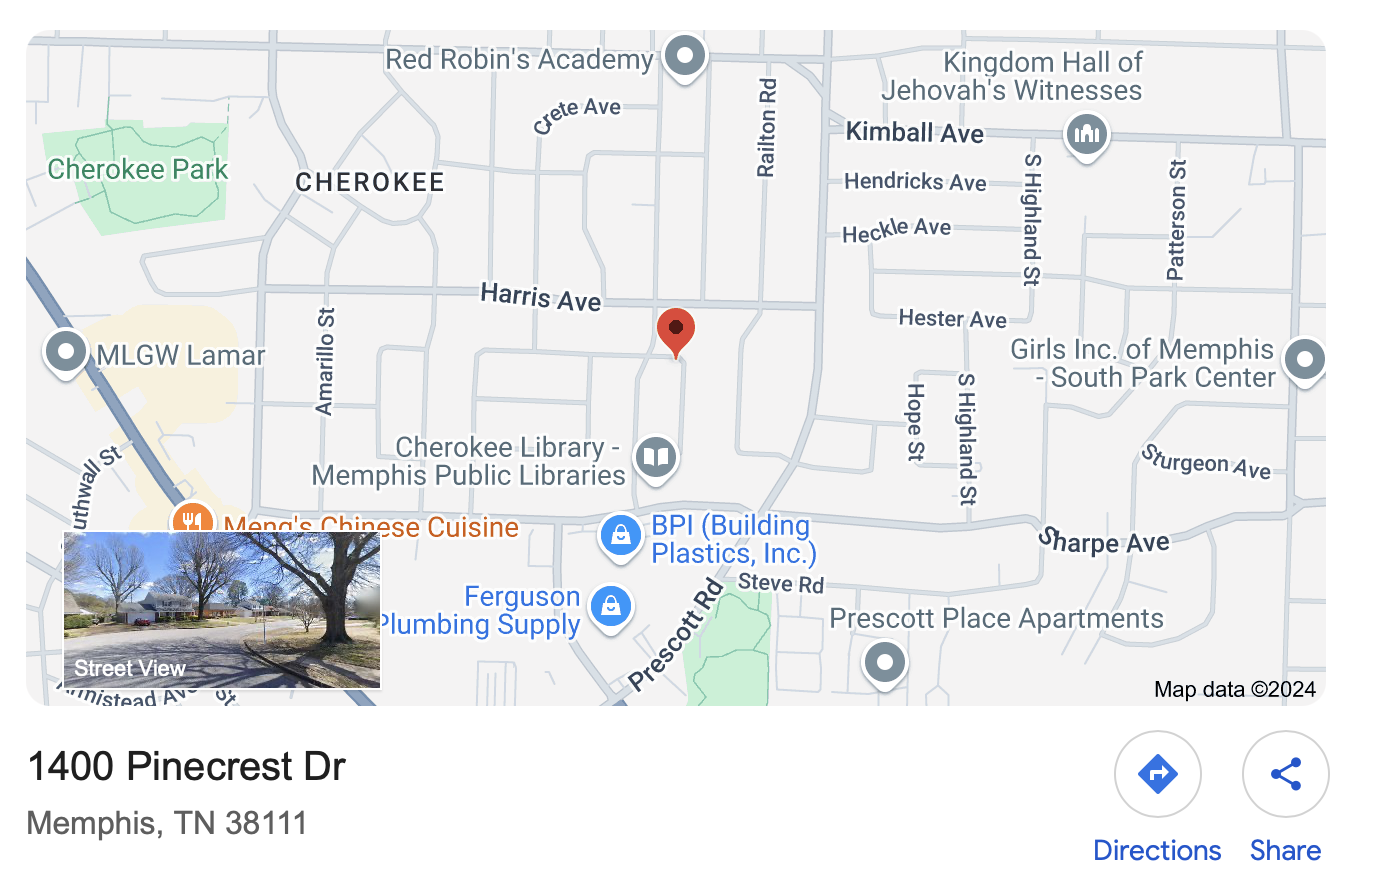

In [ ]:
# Removing hyphen and trailing string in Zip

def clean_zip(zip_code):
    if isinstance(zip_code, str):
        zip_code = zip_code.split('-')[0].strip()
        return zip_code
    else:
        return zip_code

data['Zip'] = data['Zip'].apply(clean_zip)

data['Zip'].unique()

array(['38106', '38115', '38109', '38128', '38112', '38127', '38114',
       '38149', '38117', '38134', '38111', '38104', '38105', '38122',
       '38107', '38118', '38116', '38126', '31828', '38141', '38108',
       '38103', '38016', '38125', '38119', '38133', '38018', '38120',
       '31833', '38010', '38101', '38132', '38404', '28127', '38124',
       '38102', '12322', '30107', '38012', '39117', '38060', '38110',
       '30120', '39112', '38138', '30104', '38017', '38135', '38002',
       '38015', '38137', '38155', '38011', '38148', '38022', '38218',
       '38019', '30106', '30109', '39016', '30134', '38131', '38152',
       '39115', '38013', '38014', '38157', '38146', '38818', '35016',
       '30103', '30116', '38186', '38088', '38000', '31806', '38113',
       '38217', '68125', '30115', '33122', '32127', '38147', '30127',
       '38150', '37114', '23127', '38144', '38815', '68116', '38434',
       '83133', '38140', '37043', '38181', '70005', '30016', '35104',
       '38121', '381

In [ ]:

def prepend_memphis_zipcode(zip_code):
  """Cleans and standardizes zip code data.

  Args:
    zip_code: The zip code as a string.

  Returns:
    The cleaned zip code as a string, or NaN if it cannot be cleaned.
  """
  if isinstance(zip_code, str):
    zip_code = zip_code.strip()  # Remove leading/trailing spaces
    if len(zip_code) >= 5 and zip_code.isdigit():
      if zip_code.startswith('38'):
        return zip_code[:5]
      else:
        return '38' + zip_code[2:5]  # Replace if it doesn't start with 38
    else:
      return np.nan  # Handle invalid zip codes as NaN
  else:
    return np.nan

# Apply the cleaning function to the 'Zip' column
data['Zip'] = data['Zip'].apply(prepend_memphis_zipcode)
data['Zip'].unique()

array(['38106', '38115', '38109', '38128', '38112', '38127', '38114',
       '38149', '38117', '38134', '38111', '38104', '38105', '38122',
       '38107', '38118', '38116', '38126', '38828', '38141', '38108',
       '38103', '38016', '38125', '38119', '38133', '38018', '38120',
       '38833', '38010', '38101', '38132', '38404', '38124', '38102',
       '38322', '38012', '38060', '38110', '38138', '38017', '38135',
       '38002', '38015', '38137', '38155', '38011', '38148', '38022',
       '38218', '38019', '38131', '38152', '38013', '38014', '38157',
       '38146', '38818', '38186', '38088', '38000', '38806', '38113',
       '38217', '38147', '38150', '38144', '38815', '38434', '38140',
       '38043', '38181', '38005', '38121', '38166', '38129', '38123',
       '38158', '38034', '38028', '38503', '38053', '38177', '38170',
       '38671', '38804', '38139', '38136', nan, '38199', '38408', '38407',
       '38816', '38130', '38807', '38187', '38886', '38314', '38206',
       '38403',

In [ ]:
data = data.dropna(subset=['Zip'])
data.isnull().sum()

Crime ID                       0
Offense Date                   0
Reported Date                  0
Agency Crime ID                0
UCR Incident Code              0
UCR Description                0
UCR Category                   0
Offense Group (NIBRS)          0
Group (NIBRS)                  0
100 Block                   1756
Street Name                   11
City                         124
State                          0
Zip                            0
Full Address (100 Block)       0
Lat                            0
Long                           0
Precinct                    1259
Ward                        1259
Part One/Two                   0
Location                       0
100 Block_Coordinates          0
dtype: int64

Now, checking *100 Block* column which looks like something derived from *Full Address (100 Block)*. To analyze this, some rows were checked and filled if NaN.

In [ ]:
null_100_block_rows = data[data['100 Block'].isnull()]
null_100_block_rows[['100 Block', 'Full Address (100 Block)']]


,100 Block,Full Address (100 Block)
804,NaN,I-40//N WATKINS ST MEMPHIS TN 38127
1242,NaN,I-55//E SHELBY DR MEMPHIS TN 38116
1524,NaN,COVINGTON PIKE//INTERSTATE 40 MEMPHIS TN 38128
3263,NaN,FIVE COLONIES LN//CRESTRIDGE RD MEMPHIS TN 38119
4105,NaN,I-55//THIRD ST MEMPHIS TN 38115
...,...,...
638533,NaN,W WALDORF AVE//FLORIDA ST MEMPHIS TN 38109
638765,NaN,W WALDORF AVE//FLORIDA ST MEMPHIS TN 38109
639057,NaN,I-240 E MEMPHIS TN 38109
639075,NaN,385//WINCHESTER RD MEMPHIS TN 38125


In [ ]:
data['100 Block'] = data['100 Block'].fillna(0.0)
data['100 Block'].unique()

array([ 1300.,  1800.,  4800.,  3500.,  3100.,  3600.,  2600.,  1400.,
         600.,  2000.,  2800.,  5900.,  5100.,  4200.,  2900.,  1100.,
        3300.,  6400.,  1600.,   900.,  1900.,  5300.,   200.,  3000.,
        4500.,   400.,  2300.,  3800.,  4100.,  1000.,  4400.,  5000.,
        1700.,  2700.,  6100.,   800.,   700.,  1200.,  4700.,  3400.,
        1500.,  4300.,  5500.,  4900.,  3900.,  5200.,   300.,  2200.,
        6200.,   100.,  3200.,  4000.,  6600.,  7500.,  5800.,   500.,
        8400.,  6300.,  2500.,  6700.,  5400.,  3700.,  2100.,  6000.,
           0.,  9000.,  2400.,  7000.,  8200.,  8000.,  6900.,  7900.,
        4600.,  7200.,  8500.,  5700.,  7600.,  7300.,  7700.,  7400.,
        7800.,  9400.,  9100.,  8600.,  7100.,  5600.,  9700.,  6500.,
        8300.,  6800.,  8900.,  9900.,  8100.,  8800.,  9800.,  8700.,
       10100.,  9300.,  9200., 10000.,  9600., 11000., 12300., 10200.,
       10400., 11400.,  9500., 10300., 10900., 12000., 10500.])

Also, *Full Address (100 Block)* contains Street Name from the above query. However, digging down further, it seems the street name itself is missing, so, filling that with N/A.

In [ ]:
null_street_name_rows = data[data['Street Name'].isnull()]
null_street_name_rows[['Street Name', 'Full Address (100 Block)', 'Location']]


,Street Name,Full Address (100 Block),Location
0,NaN,1300 MEMPHIS TN 38106,POINT (-89.997490 34.841180)
411,NaN,1400 MEMPHIS TN 38106,POINT (-89.997000 34.839790)
3162,NaN,1400 MEMPHIS TN 38106,POINT (-90.05 35.1)
3513,NaN,1400 MEMPHIS TN 38106,POINT (-89.997000 34.839790)
4027,NaN,3400 MEMPHIS TN 38122,POINT (-90.196680 32.347610)
5647,NaN,3400 MEMPHIS TN 38122,POINT (-90.196680 32.347610)
17109,NaN,3500 MEMPHIS TN 38128,POINT (-89.92 35.21)
44976,NaN,900 MEMPHIS TN 38126,POINT (-89.998350 34.847220)
59639,NaN,4500 MEMPHIS TN 38141,POINT (-89.84 35.02)
163764,NaN,2700 MEMPHIS TN 38114,POINT (-89.96 35.09)


In [ ]:
data['Street Name'] = data['Street Name'].fillna('N/A')
data['Street Name'].unique()

array(['N/A', 'PENDLETON', 'ORTIE DR', ..., 'WINPLACE ST', 'BIRCH RUN DR',
       'FRANCISCO ST'], dtype=object)

Performing similar operation as Street Name in City, Precinct, and Ward columns as well

In [ ]:
null_city_rows = data[data['City'].isnull()]
null_city_rows[['City', 'Full Address (100 Block)', 'Location']]

,City,Full Address (100 Block),Location
40592,NaN,100 NORTH MAIN TN 38103,POINT (-90.050970 35.147360)
48205,NaN,100 NORTH MAIN TN 38103,POINT (-90.050970 35.147360)
49427,NaN,100 NORTH MAIN TN 38103,POINT (-90.050970 35.147360)
82477,NaN,6500 WINCHESTER RD TN 38115,POINT (-89.84 35.05)
82522,NaN,900 E BROOKS RD TN 38116,POINT (-90.03 35.06)
...,...,...,...
619739,NaN,1300 GETWELL TN 38111,POINT (-89.93 35.09)
626083,NaN,3900 AUSTIN PEAY HWY TN 38128,POINT (-89.89 35.23)
628468,NaN,1300 ELVIS PRESLEY BLVD TN 38106,POINT (-90.02 35.1)
630760,NaN,2700 MISTY BAY DR TN 38016,POINT (-89.8 35.2)


In [ ]:
data['City'] = data['City'].fillna('N/A')
data['City'].unique()

array(['MEMPHIS', 'CORDOVA', ', TN', 'SOMERVILLE', 'MILLINGTON',
       'OLIVE BRANCH', 'ARLINGTON', 'OAKLAND', 'COVINGTON', 'LAKELAND',
       'MEMOHIS', 'MEMPIS', 'ROSSVILLE', 'BMEMPHIS', 'CLARKSVILLE',
       'BARTLETT', 'GERMANTOWN', 'MARION', 'EADS', 'N/A', 'SOUTHAVEN',
       'ME', 'MEMPHIS,TN', 'WEST MEMPHIS', 'ROBINSONVILLE', 'MEMNPHIS',
       'MEEMPHIS', 'MEMPJIS', 'ELLENDALE', 'MEMHIS', 'MEMHPIS', 'M',
       '6MEMPHIS', '38104', 'APPLING FARMS', 'MEMPHIS, TN', 'MPHS', '`',
       'MEMPHIST', 'MMEPHIS', 'COLLIERVILLE', 'A', 'NOT HISPANIC OR LA',
       'MEMPHISSLO', 'MEMO', 'TN', 'CARDOVA', 'MEMPHIS`', 'MEMPHIS TN'],
      dtype=object)

In [ ]:
data['Precinct'] = data['Precinct'].fillna('N/A')
data['Precinct'].unique()

array(['CRUMP', 'AIRWAYS', 'RAINES', 'AUSTIN PEAY', 'TILLMAN',
       'MT MORIAH', 'APPLING FARMS', 'RIDGEWAY', 'NORTH MAIN', 'N/A',
       'STIS', 'MOTORS', '006', '001', '002', 'MEM', 'BAR', '003', '004',
       '000', '007', 'ARL', 'OCU', '008'], dtype=object)

In [ ]:
data['Ward'] = data['Ward'].fillna('N/A')
data['Ward'].unique()

array(['421', '726', '221', '125', '524', '121', '326', '821', '722',
       '122', '923', '126', '323', '523', '322', '925', '422', '423',
       '622', '526', '222', '525', '522', '725', '223', '625', '321',
       '124', '626', '521', '226', '621', '724', '723', '922', '426',
       '921', 'N/A', '123', '325', '826', '822', '224', '924', '823',
       '324', '225', '825', '824', '926', '424', '721', '624', '425',
       '623', '800', '527', 'STIS', 'MOTORS', '006', '001', '132', '332',
       '329', '330', '002', '432', 'MEM', '327', '127', '628', '627',
       '328', 'BAR', '003', '430', '232', '230', '004', '227', '130',
       '000', '911', '007', '811', '511', '111', '311', '211', 'ARL',
       'OCU', '611', '700', '411', '600', '711', '008', '900', '500',
       '400', '200', '228'], dtype=object)

In [ ]:
data.isnull().sum()

Crime ID                    0
Offense Date                0
Reported Date               0
Agency Crime ID             0
UCR Incident Code           0
UCR Description             0
UCR Category                0
Offense Group (NIBRS)       0
Group (NIBRS)               0
100 Block                   0
Street Name                 0
City                        0
State                       0
Zip                         0
Full Address (100 Block)    0
Lat                         0
Long                        0
Precinct                    0
Ward                        0
Part One/Two                0
Location                    0
100 Block_Coordinates       0
dtype: int64

Now, there is no missing column data. 

The next step is to look out if there are any duplicate data in the whole dataset as well as some important columns. 

In [ ]:
data.duplicated().sum()

np.int64(89)

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

According to the Data dictionary description, Crime ID in combination with UCR Incident Code should be unique. 

In [ ]:
data['Crime ID'].value_counts()[data['Crime ID'].value_counts() > 1]

Crime ID
2301012619ME    6
2405029901ME    5
2311020223ME    5
2003009824ME    5
2406027627ME    5
               ..
2009005521ME    2
1801005943ME    2
2409024673ME    2
2305034074ME    2
2204010221ME    2
Name: count, Length: 45387, dtype: int64

It is observed that some of the rows have duplicate rows. In those cases, the duplicates are removed by only keeping the first occurence. 

In [ ]:
data[data['Crime ID'] == '2301012619ME']

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,State,Zip,Full Address (100 Block),Lat,Long,Precinct,Ward,Part One/Two,Location,100 Block_Coordinates
458464,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
463779,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,VANDALISM/FELONY,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
465342,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,DRUGS/NARCOTICS VIOLATION/FELONY,35A,DRUG/NARCOTIC VIOLS,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
465958,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
470140,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,STOLEN PROPERTY OFFENSE,280,STOLEN PROPERTY,STOLEN PROPERTY,CRIMES AGAINST PROPERTY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
478151,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,AGGRAVATED ASSAULT,13A,AGGRAVATED ASSAULT,AGGRAVATED ASSAULT,CRIMES AGAINST PERSONS,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,1.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)


In [ ]:
data = data.drop_duplicates(subset=['Crime ID', 'UCR Incident Code'], keep='first')

In [ ]:
data[data['Crime ID'] == '2301012619ME']

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,State,Zip,Full Address (100 Block),Lat,Long,Precinct,Ward,Part One/Two,Location,100 Block_Coordinates
458464,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
463779,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,VANDALISM/FELONY,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
465342,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,DRUGS/NARCOTICS VIOLATION/FELONY,35A,DRUG/NARCOTIC VIOLS,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
465958,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
470140,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,STOLEN PROPERTY OFFENSE,280,STOLEN PROPERTY,STOLEN PROPERTY,CRIMES AGAINST PROPERTY,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,2.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)
478151,2301012619ME,01/24/2023 08:50:00 PM,01/24/2023 09:03:00 PM,AGGRAVATED ASSAULT,13A,AGGRAVATED ASSAULT,AGGRAVATED ASSAULT,CRIMES AGAINST PERSONS,A,3700.0,...,TN,38108,3700 JACKSON AVE MEMPHIS TN 38108,35.17,-89.93,OCU,OCU,1.0,POINT (-89.93 35.17),POINT (-89.9372 35.17818)


# Exploratory Data Analysis

In [ ]:
# Method to plot distribution of a column
def plot_distribution(df, field, top10=False):
    # Count incidents 
    counts = df[field].value_counts().sort_values(ascending=False)
    if top10:
        counts = counts.head(10)
    # Create simple bar plot
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    
    # Add labels
    plt.title('Distribution')
    plt.xlabel(field)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)
    
    plt.show()

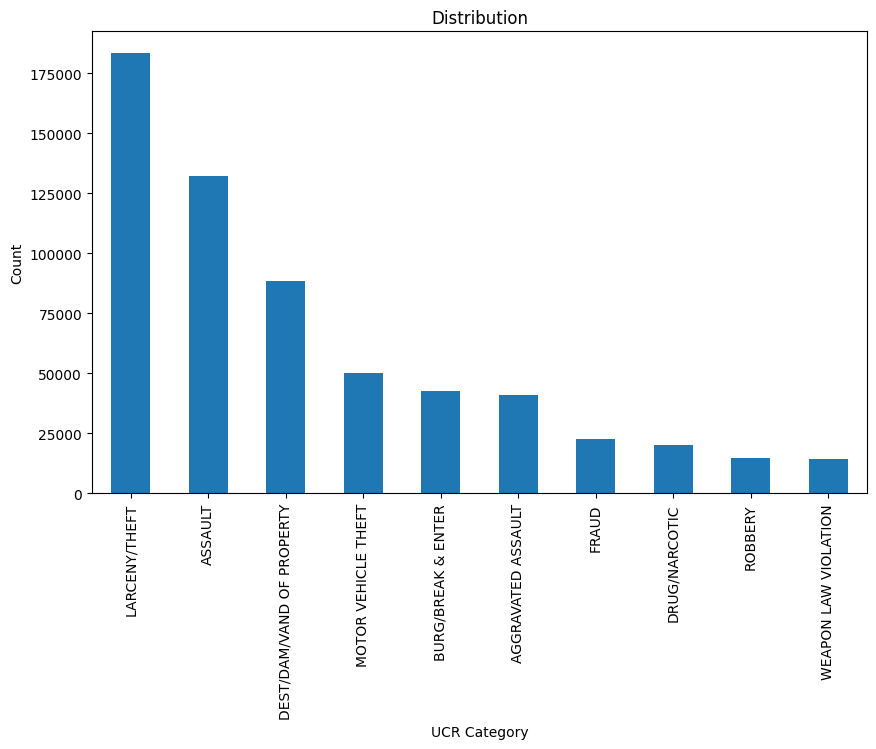

In [ ]:
plot_distribution(data, 'UCR Category', top10=True)

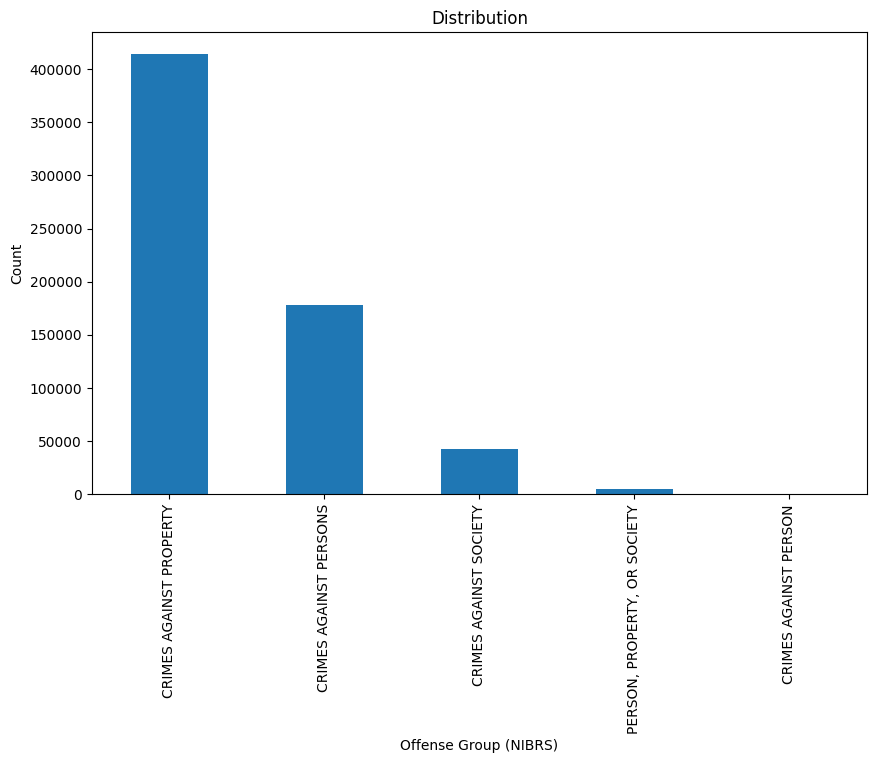

In [ ]:
plot_distribution(data, 'Offense Group (NIBRS)')

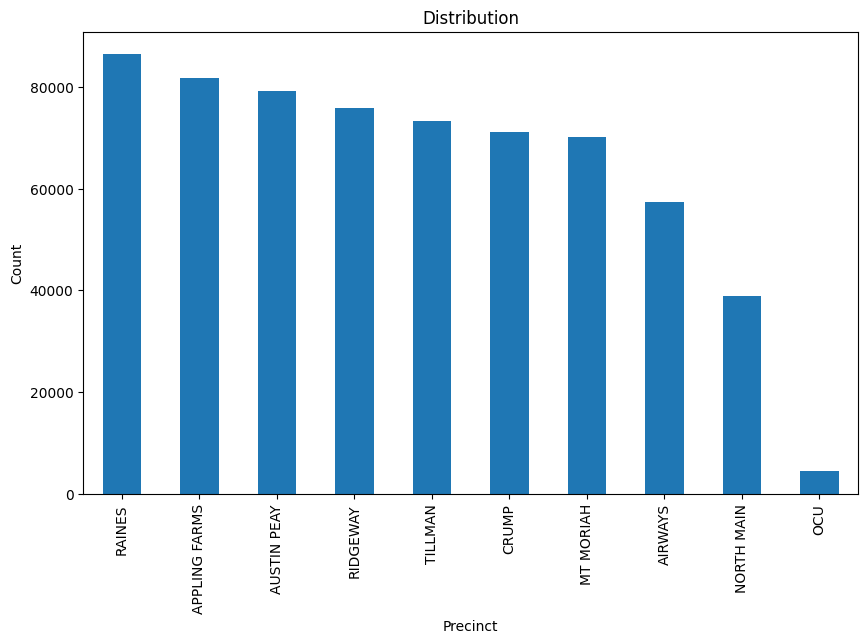

In [ ]:
plot_distribution(data, 'Precinct', top10=True)

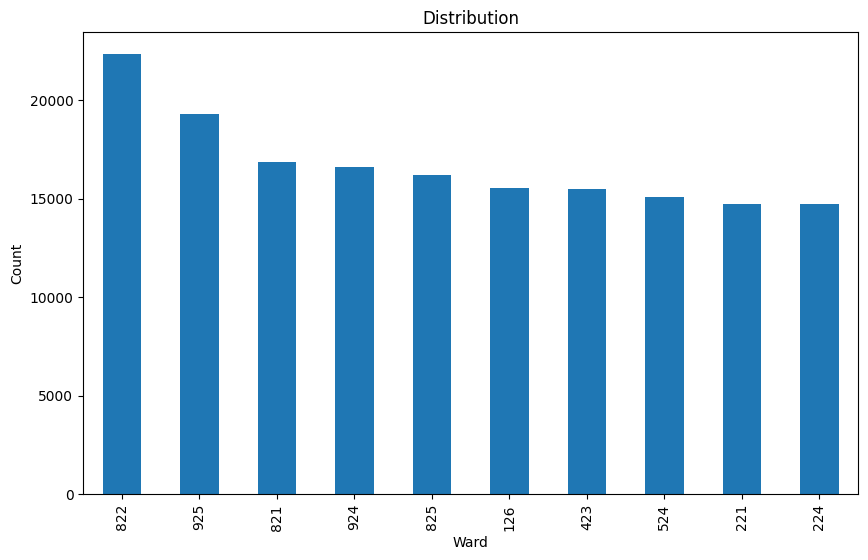

In [ ]:
plot_distribution(data, 'Ward', top10=True)

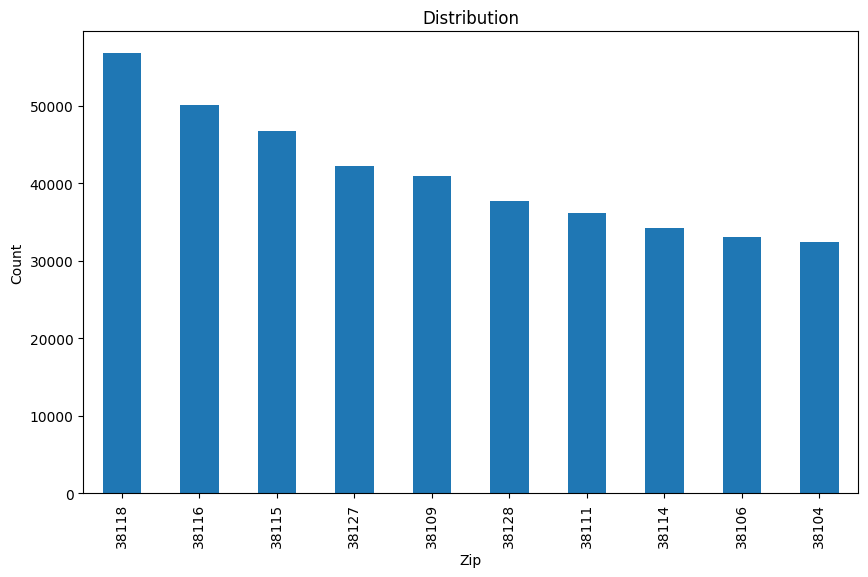

In [ ]:
plot_distribution(data, 'Zip', top10=True)

# Feature Engineering

The next step involves deriving new columns that will be helpful for finding additional patterns in the data.

In [ ]:
data.dtypes

Crime ID                     object
Offense Date                 object
Reported Date                object
Agency Crime ID              object
UCR Incident Code            object
UCR Description              object
UCR Category                 object
Offense Group (NIBRS)        object
Group (NIBRS)                object
100 Block                   float64
Street Name                  object
City                         object
State                        object
Zip                          object
Full Address (100 Block)     object
Lat                         float64
Long                        float64
Precinct                     object
Ward                         object
Part One/Two                float64
Location                     object
100 Block_Coordinates        object
dtype: object

Now, coverting Offense Date and Reported Date to Date Time format and also deriving year, month, day, hour, day of week from these two columns.

In [ ]:
data['Offense Date Time'] = pd.to_datetime(data['Offense Date'])  # Convert to datetime
data.loc[:, 'Year'] =  data['Offense Date Time'].dt.year
data.loc[:, 'Month'] = data['Offense Date Time'].dt.month
data.loc[:, 'Day'] = data['Offense Date Time'].dt.day
data.loc[:, 'Hour'] = data['Offense Date Time'].dt.hour
data.loc[:,'DayOfWeek'] = data['Offense Date Time'].dt.day_name()
data[['Offense Date Time', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']]

,Offense Date Time,Year,Month,Day,Hour,DayOfWeek
0,2018-03-26 21:50:00,2018,3,26,21,Monday
1,2018-02-25 20:00:00,2018,2,25,20,Sunday
2,2018-07-30 10:45:00,2018,7,30,10,Monday
3,2018-08-20 00:00:00,2018,8,20,0,Monday
4,2018-09-20 16:00:00,2018,9,20,16,Thursday
...,...,...,...,...,...,...
640221,2024-10-09 11:56:00,2024,10,9,11,Wednesday
640222,2024-11-09 16:16:00,2024,11,9,16,Saturday
640223,2024-10-03 08:45:00,2024,10,3,8,Thursday
640224,2024-10-07 20:31:00,2024,10,7,20,Monday


In [ ]:
data['Year'].value_counts() #checking what are the unique values for Year column

Year
2023    107853
2022     97037
2018     94109
2019     89846
2020     85622
2021     83231
2024     82235
2094         2
Name: count, dtype: int64

There's 2 rows that correspond to the year 2094

In [ ]:
data[data['Year'] == 2094] 

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,Ward,Part One/Two,Location,100 Block_Coordinates,Offense Date Time,Year,Month,Day,Hour,DayOfWeek
494128,2306008291ME,07/12/2094 08:00:00 AM,06/27/2023 06:22:00 PM,IDENTITY THEFT,26F,IDENTITY THEFT,FRAUD,CRIMES AGAINST PROPERTY,A,2000.0,...,226,2.0,POINT (-90 35.02),POINT (-89.99712 35.02739),2094-07-12 08:00:00,2094,7,12,8,Monday
499193,2306008291ME,07/12/2094 08:00:00 AM,06/27/2023 06:22:00 PM,FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,26A,FALSE PRETENSES/SWIN/CONF,FRAUD,CRIMES AGAINST PROPERTY,A,2000.0,...,226,2.0,POINT (-90 35.02),POINT (-89.99712 35.02739),2094-07-12 08:00:00,2094,7,12,8,Monday


There are crimes reported in 2094 with reported date in 2023. It may be a typo during data entry phase. Clearing these two rows just to make the data consistent.

In [ ]:
data = data[data['Year'] <= 2024]
data['Year'].unique()

array([2018, 2019, 2024, 2020, 2021, 2022, 2023], dtype=int32)

In [ ]:
data['Reported Date Time'] = pd.to_datetime(data['Reported Date'])  # Convert to datetime
data.loc[:, 'Reported Year'] = data['Reported Date Time'].dt.year
data.loc[:, 'Reported Month'] = data['Reported Date Time'].dt.month
data.loc[:, 'Reported Day'] = data['Reported Date Time'].dt.day
data.loc[:, 'Reported Hour'] = data['Reported Date Time'].dt.hour
data.loc[:,'Reported DayOfWeek'] = data['Reported Date Time'].dt.day_name()
data[['Reported Date Time', 'Reported Year', 'Reported Month', 'Reported Day', 'Reported Hour', 'Reported DayOfWeek']]

,Reported Date Time,Reported Year,Reported Month,Reported Day,Reported Hour,Reported DayOfWeek
0,2018-03-26 23:34:00,2018,3,26,23,Monday
1,2018-02-25 20:35:00,2018,2,25,20,Sunday
2,2018-07-30 11:13:00,2018,7,30,11,Monday
3,2018-09-02 10:34:00,2018,9,2,10,Sunday
4,2018-09-20 17:01:00,2018,9,20,17,Thursday
...,...,...,...,...,...,...
640221,2024-10-09 11:56:00,2024,10,9,11,Wednesday
640222,2024-11-09 17:15:00,2024,11,9,17,Saturday
640223,2024-10-03 09:57:00,2024,10,3,9,Thursday
640224,2024-10-09 02:19:00,2024,10,9,2,Wednesday


In [ ]:
downtown_coords = (35.1495, -90.0490)  # Memphis downtown coordinates
data['Distance from Downtown'] = data.apply(
        lambda row: geodesic(downtown_coords, (row['Lat'], row['Long'])).miles
        if pd.notnull(row['Lat']) and pd.notnull(row['Long'])
        else np.nan,
        axis=1
    )
data['Distance from Downtown'].value_counts(sorted).sort_values(ascending=False)

Distance from Downtown
0.657344     0.016466
13.568573    0.008581
0.829820     0.008440
11.031203    0.007434
5.188128     0.007116
               ...   
0.608996     0.000002
1.632329     0.000002
6.252965     0.000002
8.465225     0.000002
5.543362     0.000002
Name: proportion, Length: 7181, dtype: float64

In [ ]:
def add_severity_classification(df):
    """
    Adds a severity classification column based on the first digit of UCR Incident Code.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing crime data with 'UCR Incident Code' column
    
    Returns:
    pandas.DataFrame: Original DataFrame with new 'severity' column
    """
    # Extract first digit from UCR Code and convert to numeric
    df['severity'] = df['UCR Incident Code'].str[0].astype(int)
    return df
add_severity_classification(data)

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,Hour,DayOfWeek,Reported Date Time,Reported Year,Reported Month,Reported Day,Reported Hour,Reported DayOfWeek,Distance from Downtown,severity
0,1803013551ME,03/26/2018 09:50:00 PM,03/26/2018 11:34:00 PM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1300.0,...,21,Monday,2018-03-26 23:34:00,2018,3,26,23,Monday,21.454026,1
1,1802012717ME,02/25/2018 08:00:00 PM,02/25/2018 08:35:00 PM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,1800.0,...,20,Sunday,2018-02-25 20:35:00,2018,2,25,20,Sunday,5.793314,1
2,1807015741ME,07/30/2018 10:45:00 AM,07/30/2018 11:13:00 AM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,4800.0,...,10,Monday,2018-07-30 11:13:00,2018,7,30,11,Monday,9.263690,1
3,1809000561ME,08/20/2018 12:00:00 AM,09/02/2018 10:34:00 AM,THEFT FROM BUILDING,23D,THEFT FROM A BUILDING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3500.0,...,0,Monday,2018-09-02 10:34:00,2018,9,2,10,Sunday,8.585893,2
4,1809010477ME,09/20/2018 04:00:00 PM,09/20/2018 05:01:00 PM,INTIMIDATION/DV,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,3100.0,...,16,Thursday,2018-09-20 17:01:00,2018,9,20,17,Thursday,5.264771,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640221,2410023522ME,10/09/2024 11:56:00 AM,10/09/2024 11:56:00 AM,VANDALISM/MISDEMEANOR,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,2100.0,...,11,Wednesday,2024-10-09 11:56:00,2024,10,9,11,Wednesday,3.973055,2
640222,2411023430ME,11/09/2024 04:16:00 PM,11/09/2024 05:15:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,800.0,...,16,Saturday,2024-11-09 17:15:00,2024,11,9,17,Saturday,1.721818,2
640223,2410020968ME,10/03/2024 08:45:00 AM,10/03/2024 09:57:00 AM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,800.0,...,8,Thursday,2024-10-03 09:57:00,2024,10,3,9,Thursday,4.910486,5
640224,2410023407ME,10/07/2024 08:31:00 PM,10/09/2024 02:19:00 AM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,2900.0,...,20,Monday,2024-10-09 02:19:00,2024,10,9,2,Wednesday,5.216021,3


In [ ]:

def add_time_of_day(df):
    """
    Adds a Time of Day column based on the offense date/time.
    
    Time periods:
    Morning: 5:00 AM - 11:59 AM
    Afternoon: 12:00 PM - 4:59 PM
    Evening: 5:00 PM - 8:59 PM
    Night: 9:00 PM - 4:59 AM
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Offense Date' column
    
    Returns:
    pandas.DataFrame: Original DataFrame with new 'time_of_day' column
    """
    # Extract hour from datetime
    # Create time of day categories
    conditions = [
        # Morning: 5 AM to 11:59 AM
        ((df['Hour'] >= 5) & (df['Hour'] < 12)),
        # Afternoon: 12 PM to 4:59 PM
        ((df['Hour'] >= 12) & (df['Hour'] < 17)),
        # Evening: 5 PM to 8:59 PM
        ((df['Hour'] >= 17) & (df['Hour'] < 21)),
        # Night: 9 PM to 4:59 AM
        ((df['Hour'] >= 21) | (df['Hour'] < 5))
    ]
    
    choices = ['Morning', 'Afternoon', 'Evening', 'Night']
    
    # Create time_of_day column
    df['Time of Day'] = np.select(conditions, choices, default='Unknown')
    
    return df
add_time_of_day(data)

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,DayOfWeek,Reported Date Time,Reported Year,Reported Month,Reported Day,Reported Hour,Reported DayOfWeek,Distance from Downtown,severity,Time of Day
0,1803013551ME,03/26/2018 09:50:00 PM,03/26/2018 11:34:00 PM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1300.0,...,Monday,2018-03-26 23:34:00,2018,3,26,23,Monday,21.454026,1,Night
1,1802012717ME,02/25/2018 08:00:00 PM,02/25/2018 08:35:00 PM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,1800.0,...,Sunday,2018-02-25 20:35:00,2018,2,25,20,Sunday,5.793314,1,Evening
2,1807015741ME,07/30/2018 10:45:00 AM,07/30/2018 11:13:00 AM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,4800.0,...,Monday,2018-07-30 11:13:00,2018,7,30,11,Monday,9.263690,1,Morning
3,1809000561ME,08/20/2018 12:00:00 AM,09/02/2018 10:34:00 AM,THEFT FROM BUILDING,23D,THEFT FROM A BUILDING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3500.0,...,Monday,2018-09-02 10:34:00,2018,9,2,10,Sunday,8.585893,2,Night
4,1809010477ME,09/20/2018 04:00:00 PM,09/20/2018 05:01:00 PM,INTIMIDATION/DV,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,3100.0,...,Thursday,2018-09-20 17:01:00,2018,9,20,17,Thursday,5.264771,1,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640221,2410023522ME,10/09/2024 11:56:00 AM,10/09/2024 11:56:00 AM,VANDALISM/MISDEMEANOR,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,2100.0,...,Wednesday,2024-10-09 11:56:00,2024,10,9,11,Wednesday,3.973055,2,Morning
640222,2411023430ME,11/09/2024 04:16:00 PM,11/09/2024 05:15:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,800.0,...,Saturday,2024-11-09 17:15:00,2024,11,9,17,Saturday,1.721818,2,Afternoon
640223,2410020968ME,10/03/2024 08:45:00 AM,10/03/2024 09:57:00 AM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,800.0,...,Thursday,2024-10-03 09:57:00,2024,10,3,9,Thursday,4.910486,5,Morning
640224,2410023407ME,10/07/2024 08:31:00 PM,10/09/2024 02:19:00 AM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,2900.0,...,Monday,2024-10-09 02:19:00,2024,10,9,2,Wednesday,5.216021,3,Evening


In [ ]:

def add_memphis_indicator(df):
    """
    Adds a boolean column indicating whether the city is Memphis (1) or not (0)
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'City' column
    
    Returns:
    pandas.DataFrame: Original DataFrame with new 'is_memphis' column
    """
    # Create boolean column (1 for Memphis, 0 for other cities)
    df['is_memphis'] = (df['City'].str.upper() == 'MEMPHIS').astype(int)
    
    return df

add_memphis_indicator(data)

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,Reported Date Time,Reported Year,Reported Month,Reported Day,Reported Hour,Reported DayOfWeek,Distance from Downtown,severity,Time of Day,is_memphis
0,1803013551ME,03/26/2018 09:50:00 PM,03/26/2018 11:34:00 PM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1300.0,...,2018-03-26 23:34:00,2018,3,26,23,Monday,21.454026,1,Night,1
1,1802012717ME,02/25/2018 08:00:00 PM,02/25/2018 08:35:00 PM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,1800.0,...,2018-02-25 20:35:00,2018,2,25,20,Sunday,5.793314,1,Evening,1
2,1807015741ME,07/30/2018 10:45:00 AM,07/30/2018 11:13:00 AM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,4800.0,...,2018-07-30 11:13:00,2018,7,30,11,Monday,9.263690,1,Morning,1
3,1809000561ME,08/20/2018 12:00:00 AM,09/02/2018 10:34:00 AM,THEFT FROM BUILDING,23D,THEFT FROM A BUILDING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3500.0,...,2018-09-02 10:34:00,2018,9,2,10,Sunday,8.585893,2,Night,1
4,1809010477ME,09/20/2018 04:00:00 PM,09/20/2018 05:01:00 PM,INTIMIDATION/DV,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,3100.0,...,2018-09-20 17:01:00,2018,9,20,17,Thursday,5.264771,1,Afternoon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640221,2410023522ME,10/09/2024 11:56:00 AM,10/09/2024 11:56:00 AM,VANDALISM/MISDEMEANOR,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,2100.0,...,2024-10-09 11:56:00,2024,10,9,11,Wednesday,3.973055,2,Morning,1
640222,2411023430ME,11/09/2024 04:16:00 PM,11/09/2024 05:15:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,800.0,...,2024-11-09 17:15:00,2024,11,9,17,Saturday,1.721818,2,Afternoon,1
640223,2410020968ME,10/03/2024 08:45:00 AM,10/03/2024 09:57:00 AM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,800.0,...,2024-10-03 09:57:00,2024,10,3,9,Thursday,4.910486,5,Morning,1
640224,2410023407ME,10/07/2024 08:31:00 PM,10/09/2024 02:19:00 AM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,2900.0,...,2024-10-09 02:19:00,2024,10,9,2,Wednesday,5.216021,3,Evening,1


In [ ]:
def add_weekend_indicator(df):
    """
    Adds a boolean column indicating whether the date is a weekend (1) or not (0)
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing Year, Month, and Day columns
    
    Returns:
    pandas.DataFrame: Original DataFrame with new 'is_weekend' column
    """
    
    # Get day of week (Monday = 0, Sunday = 6)
    # Create boolean column (1 for weekend, 0 for weekday)
    # Weekend is Saturday (5) and Sunday (6)
    df['is_weekend'] = data['Offense Date Time'].dt.dayofweek.isin([5, 6]).astype(int)
    return df
add_weekend_indicator(data)

,Crime ID,Offense Date,Reported Date,Agency Crime ID,UCR Incident Code,UCR Description,UCR Category,Offense Group (NIBRS),Group (NIBRS),100 Block,...,Reported Year,Reported Month,Reported Day,Reported Hour,Reported DayOfWeek,Distance from Downtown,severity,Time of Day,is_memphis,is_weekend
0,1803013551ME,03/26/2018 09:50:00 PM,03/26/2018 11:34:00 PM,ROBBERY/INDIVIDUAL,120,ROBBERY,ROBBERY,CRIMES AGAINST PROPERTY,A,1300.0,...,2018,3,26,23,Monday,21.454026,1,Night,1,0
1,1802012717ME,02/25/2018 08:00:00 PM,02/25/2018 08:35:00 PM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,1800.0,...,2018,2,25,20,Sunday,5.793314,1,Evening,1,1
2,1807015741ME,07/30/2018 10:45:00 AM,07/30/2018 11:13:00 AM,INTIMIDATION,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,4800.0,...,2018,7,30,11,Monday,9.263690,1,Morning,1,0
3,1809000561ME,08/20/2018 12:00:00 AM,09/02/2018 10:34:00 AM,THEFT FROM BUILDING,23D,THEFT FROM A BUILDING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,3500.0,...,2018,9,2,10,Sunday,8.585893,2,Night,1,0
4,1809010477ME,09/20/2018 04:00:00 PM,09/20/2018 05:01:00 PM,INTIMIDATION/DV,13C,INTIMIDATION,ASSAULT,CRIMES AGAINST PERSONS,A,3100.0,...,2018,9,20,17,Thursday,5.264771,1,Afternoon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640221,2410023522ME,10/09/2024 11:56:00 AM,10/09/2024 11:56:00 AM,VANDALISM/MISDEMEANOR,290,DEST/DAM/VAND OF PROPERTY,DEST/DAM/VAND OF PROPERTY,CRIMES AGAINST PROPERTY,A,2100.0,...,2024,10,9,11,Wednesday,3.973055,2,Morning,1,0
640222,2411023430ME,11/09/2024 04:16:00 PM,11/09/2024 05:15:00 PM,SHOPLIFTING/MISDEMEANOR,23C,SHOPLIFTING,LARCENY/THEFT,CRIMES AGAINST PROPERTY,A,800.0,...,2024,11,9,17,Saturday,1.721818,2,Afternoon,1,1
640223,2410020968ME,10/03/2024 08:45:00 AM,10/03/2024 09:57:00 AM,WEAPON LAW VIOLATIONS/FELONY,520,WEAPON LAW VIOL,WEAPON LAW VIOLATION,CRIMES AGAINST SOCIETY,A,800.0,...,2024,10,3,9,Thursday,4.910486,5,Morning,1,0
640224,2410023407ME,10/07/2024 08:31:00 PM,10/09/2024 02:19:00 AM,DRUG EQUIPMENT VIOLATION,35B,DRUG/NARCOTIC EQUIQ VIOL,DRUG/NARCOTIC,CRIMES AGAINST SOCIETY,A,2900.0,...,2024,10,9,2,Wednesday,5.216021,3,Evening,1,0


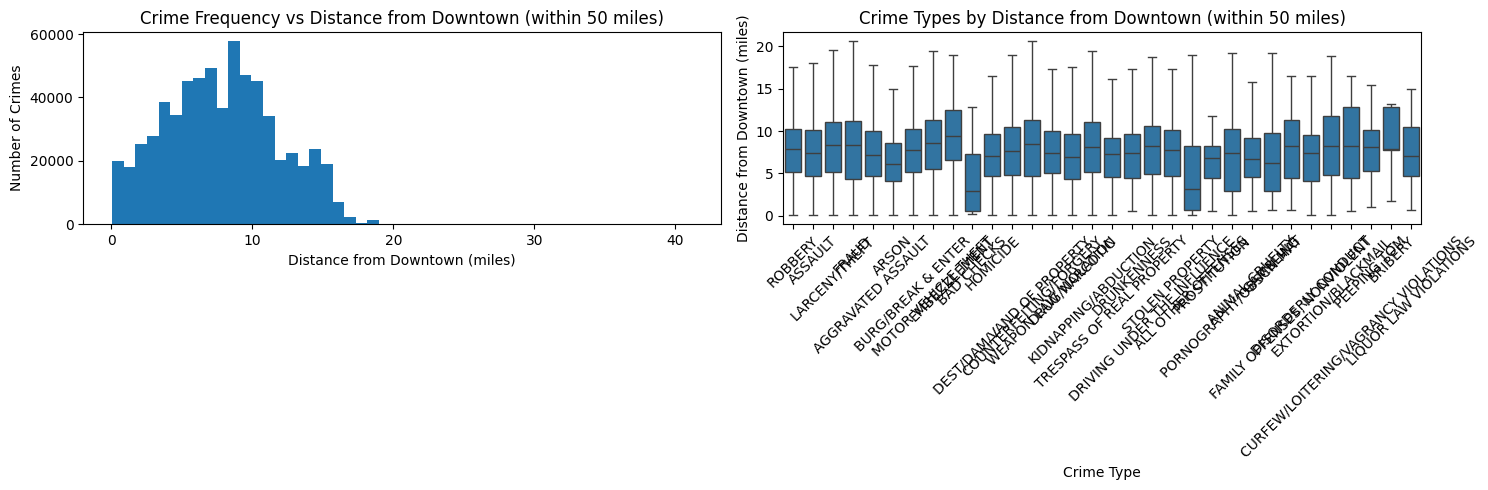

In [ ]:

def analyze_downtown_relationship(df):
    """Analyze relationship between crime and distance from downtown"""
    plt.figure(figsize=(15, 5))
    # Filter data to only include distances less than 50 miles
    df_filtered = df[df['Distance from Downtown'] < 50]

    # Plot 1: Crime frequency vs distance from downtown
    plt.subplot(1, 2, 1)
    plt.hist(df_filtered['Distance from Downtown'].dropna(), bins=50)
    plt.title('Crime Frequency vs Distance from Downtown (within 50 miles)')
    plt.xlabel('Distance from Downtown (miles)')
    plt.ylabel('Number of Crimes')

    # Plot 2: Crime types by distance
    plt.subplot(1, 2, 2)
    sns.boxplot(x='UCR Category', y='Distance from Downtown', data=df_filtered, showfliers=False)
    plt.xticks(rotation=45)
    plt.title('Crime Types by Distance from Downtown (within 50 miles)')
    plt.xlabel('Crime Type')
    plt.ylabel('Distance from Downtown (miles)')

    plt.tight_layout()
    plt.show()
analyze_downtown_relationship(data)

In [ ]:
# Define custom bins and labels
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '>20']

# Bin the data
data['binned_distance'] = pd.cut(data['Distance from Downtown'], bins=bins, labels=labels, right=False)
data['binned_distance'].value_counts()

binned_distance
5-10     283204
10-15    167050
0-5      164049
15-20     25477
>20         153
Name: count, dtype: int64

# Data Analysis after Feature Engineering

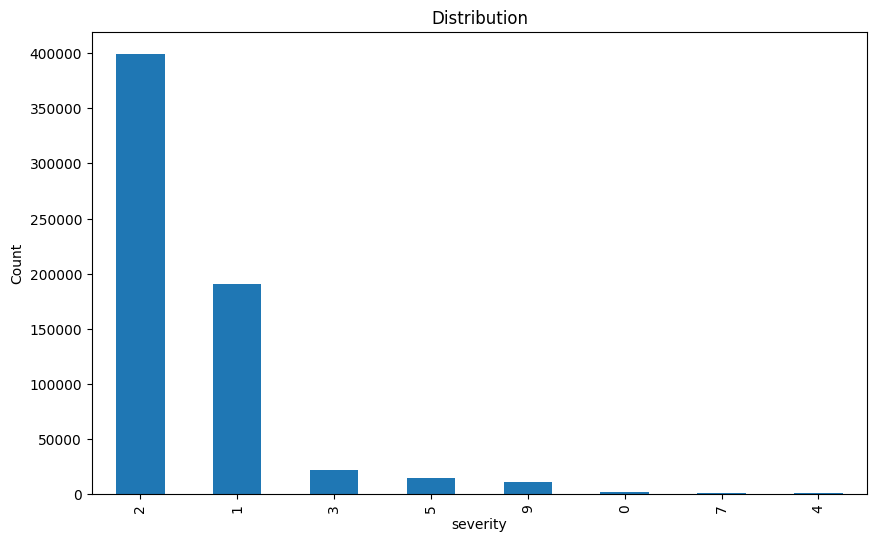

In [ ]:

plot_distribution(data, 'severity')

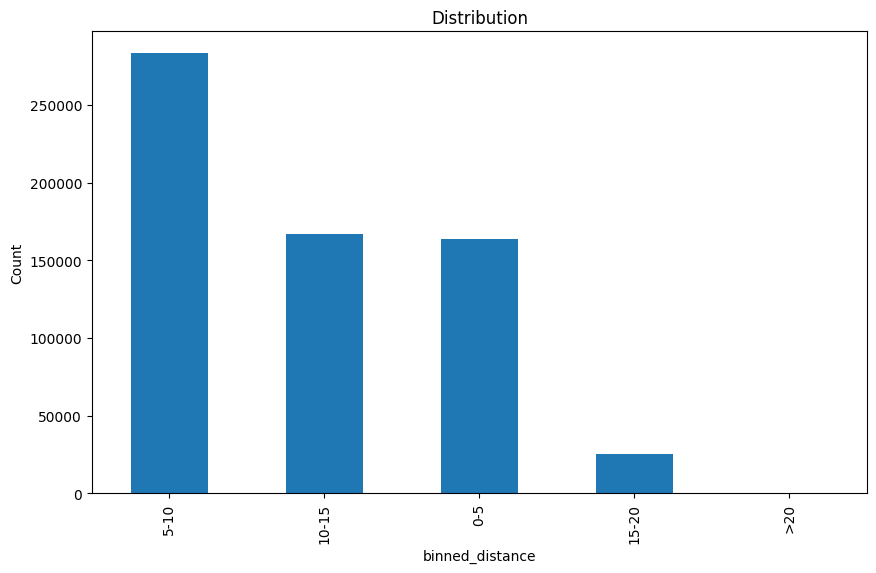

In [ ]:
plot_distribution(data,'binned_distance')

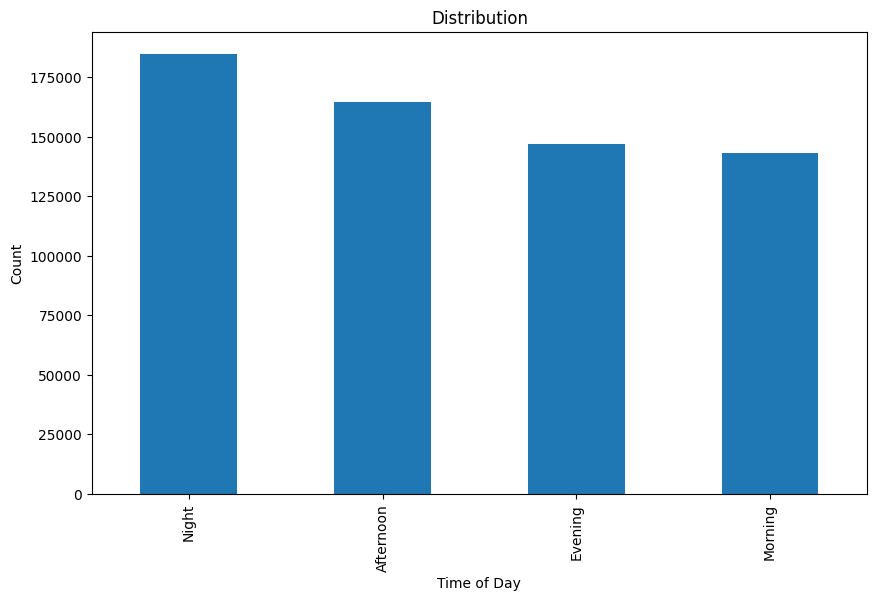

In [ ]:
plot_distribution(data, 'Time of Day')

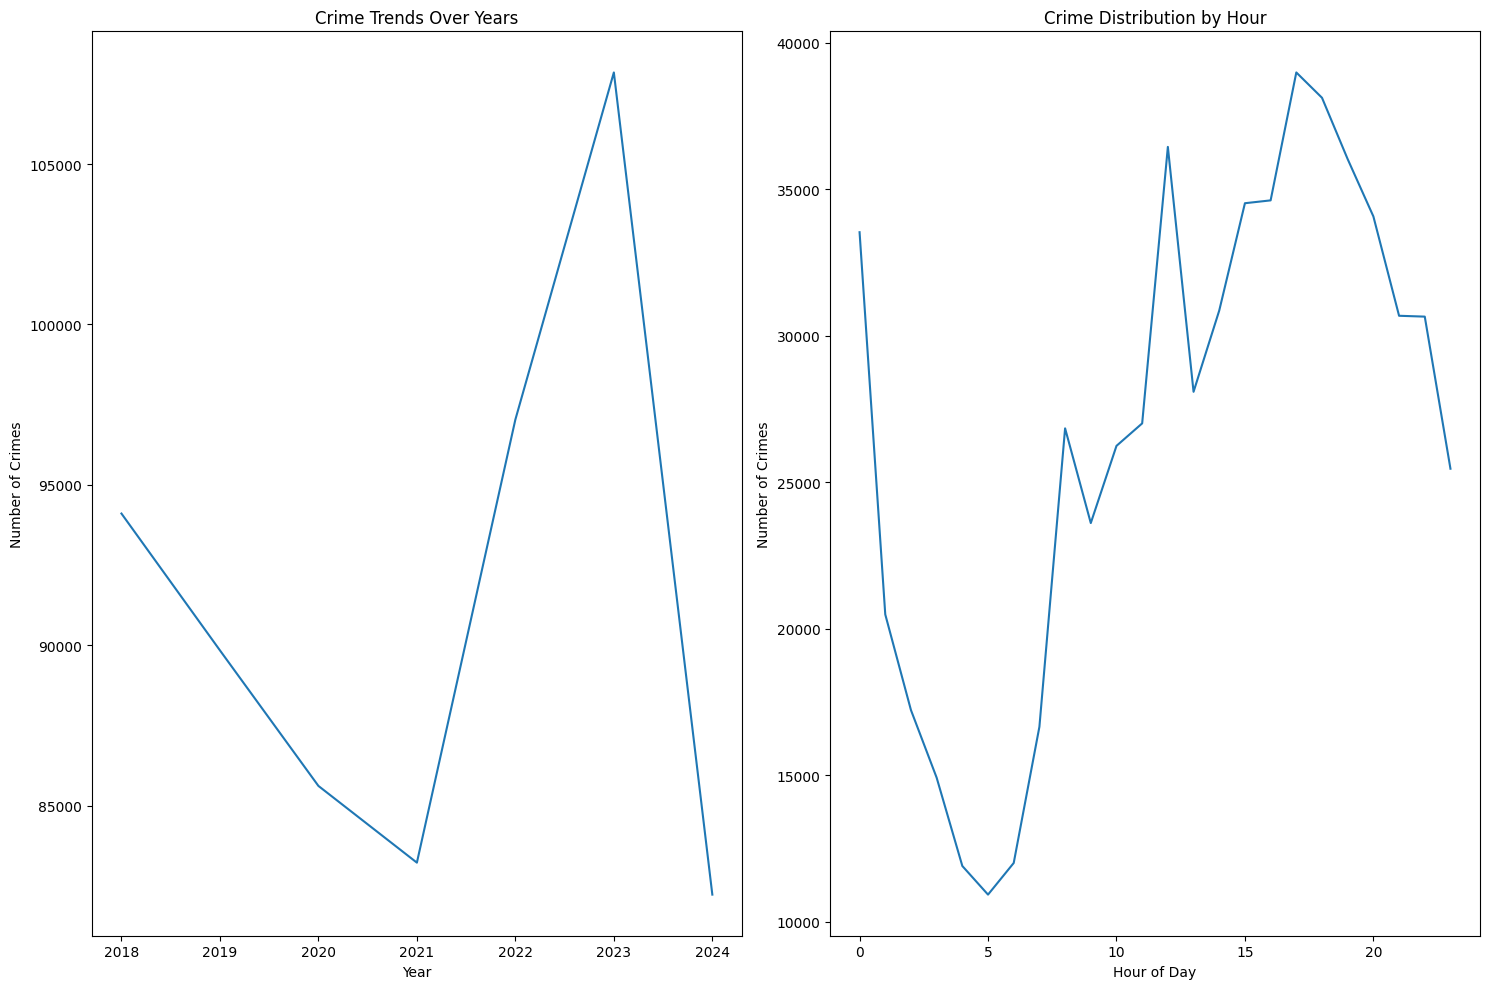

In [ ]:
def analyze_temporal_patterns(df):
    """Analyze and visualize temporal crime patterns"""
    plt.figure(figsize=(15, 10))

    # Plot 1: Crime trends over years
    plt.subplot(1, 2, 1)
    yearly_crimes = df.groupby('Year')['Crime ID'].count()
    sns.lineplot(x=yearly_crimes.index, y=yearly_crimes.values)
    plt.title('Crime Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')

    # Plot 2: Crime by hour of day
    plt.subplot(1, 2, 2)
    hourly_crimes = df.groupby('Hour')['Crime ID'].count()
    sns.lineplot(x=hourly_crimes.index, y=hourly_crimes.values)
    plt.title('Crime Distribution by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Crimes')

    plt.tight_layout()
    plt.show()
analyze_temporal_patterns(data)

## Feature Selection

In [ ]:
df = data.copy() # Backup data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639933 entries, 0 to 640225
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Crime ID                  639933 non-null  object        
 1   Offense Date              639933 non-null  object        
 2   Reported Date             639933 non-null  object        
 3   Agency Crime ID           639933 non-null  object        
 4   UCR Incident Code         639933 non-null  object        
 5   UCR Description           639933 non-null  object        
 6   UCR Category              639933 non-null  object        
 7   Offense Group (NIBRS)     639933 non-null  object        
 8   Group (NIBRS)             639933 non-null  object        
 9   100 Block                 639933 non-null  float64       
 10  Street Name               639933 non-null  object        
 11  City                      639933 non-null  object        
 12  State  

In [ ]:
# Remove redundant/related features
columns_to_remove = [
    'Crime ID', # unique key
    'Offense Date', # already broken down into year, month, day, hour, and dayofWeek
    'Offense Date Time', # same as above
    'Reported Date', # already broken down into year, month, day, hour, and dayofWeek
    'Reported Date Time', # same as above,
    'Reported Year', # almost same as Offense related date
    'Reported Month', # almost same as Offense related date
    'Reported Day', # almost same as Offense related date
    'Reported Hour', # almost same as Offense related date
    'Reported DayOfWeek', # almost same as Offense related date
    'Agency Crime ID', # not useful for knowing the crime type as it is generated internally in MPD
    'UCR Incident Code', # maps to UCR Category
    'UCR Category',
    'UCR Description', # description of UCR Category
    'Offense Group (NIBRS)', # info added by MPD
    'Group (NIBRS)', # info added by MPD
    '100 Block', # info convered by Full Address (100 Block),
    '100 Block_Coordinates', #info covered by Lat and Long,
    'Part One/Two', # determined by MPD internally
    'Location', #info covered by Lat and Long,
    'State', # Only TN, one data in MS,
    'Ward', # info covered by Precinct,
    'Hour',
    'Distance from Downtown',
    'City'
]
data.drop(columns=columns_to_remove, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639933 entries, 0 to 640225
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Street Name               639933 non-null  object  
 1   Zip                       639933 non-null  object  
 2   Full Address (100 Block)  639933 non-null  object  
 3   Lat                       639933 non-null  float64 
 4   Long                      639933 non-null  float64 
 5   Precinct                  639933 non-null  object  
 6   Year                      639933 non-null  int32   
 7   Month                     639933 non-null  int32   
 8   Day                       639933 non-null  int32   
 9   DayOfWeek                 639933 non-null  object  
 10  severity                  639933 non-null  int64   
 11  Time of Day               639933 non-null  object  
 12  is_memphis                639933 non-null  int64   
 13  is_weekend                639933 n

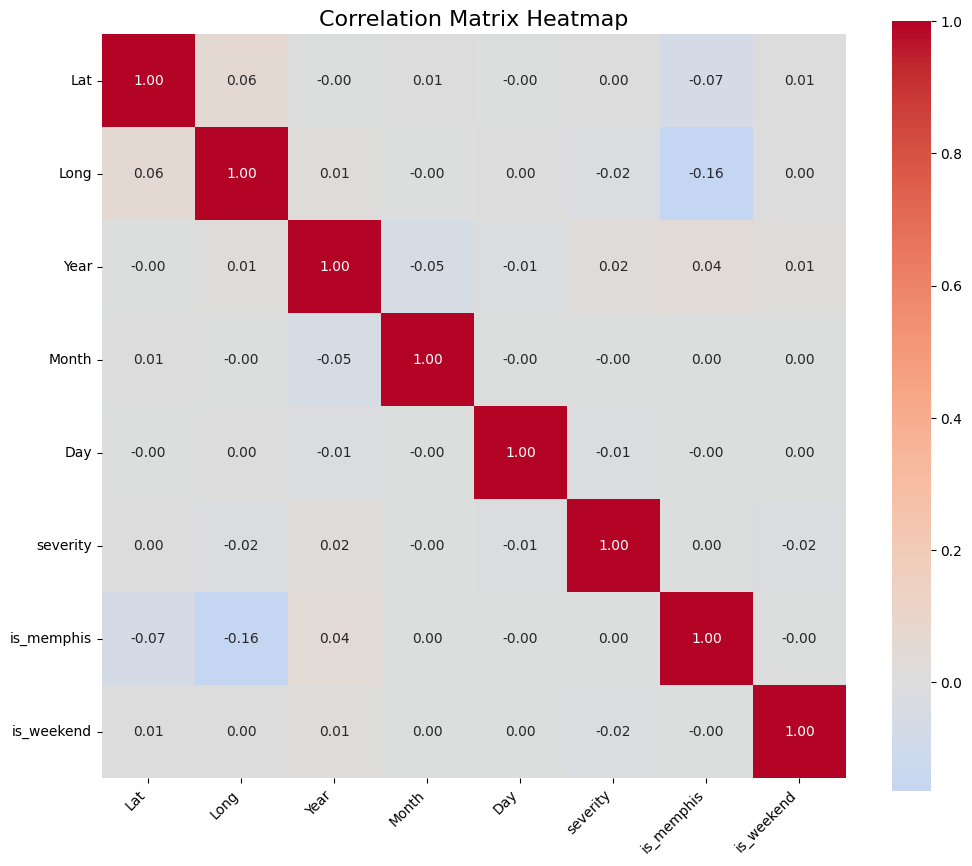

In [ ]:

# Select numeric columns for correlation analysis
numeric_features = data.select_dtypes(include=['number']).columns

correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt=".2f"
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
correlations_with_target = correlation_matrix['severity'].sort_values(ascending=False)
print("Correlations of numerical features with Severity:")
correlations_with_target

Correlations of numerical features with Severity:


severity      1.000000
Year          0.020104
Lat           0.004403
is_memphis    0.002734
Month        -0.002017
Day          -0.010551
Long         -0.016746
is_weekend   -0.022912
Name: severity, dtype: float64

In [ ]:
scaler = MinMaxScaler()
num_df = pd.DataFrame(scaler.fit_transform(data[['Lat', 'Long', 'Year', 'Month', 'Day', 'is_memphis',
       'is_weekend']]), columns=['Lat', 'Long', 'Year', 'Month', 'Day', 'is_memphis',
       'is_weekend'])
num_df = num_df.reset_index(drop=True)
num_df


,Lat,Long,Year,Month,Day,is_memphis,is_weekend
0,0.597304,0.055338,0.0,0.181818,0.833333,1.0,0.0
1,0.658333,0.058409,0.0,0.090909,0.800000,1.0,1.0
2,0.639228,0.047226,0.0,0.545455,0.966667,1.0,0.0
3,0.692891,0.061229,0.0,0.636364,0.633333,1.0,0.0
4,0.673886,0.059882,0.0,0.727273,0.633333,1.0,0.0
...,...,...,...,...,...,...,...
639928,0.673673,0.057303,1.0,0.818182,0.266667,1.0,0.0
639929,0.666487,0.051685,1.0,0.909091,0.266667,1.0,1.0
639930,0.654510,0.051685,1.0,0.818182,0.066667,1.0,0.0
639931,0.666487,0.059551,1.0,0.818182,0.200000,1.0,0.0


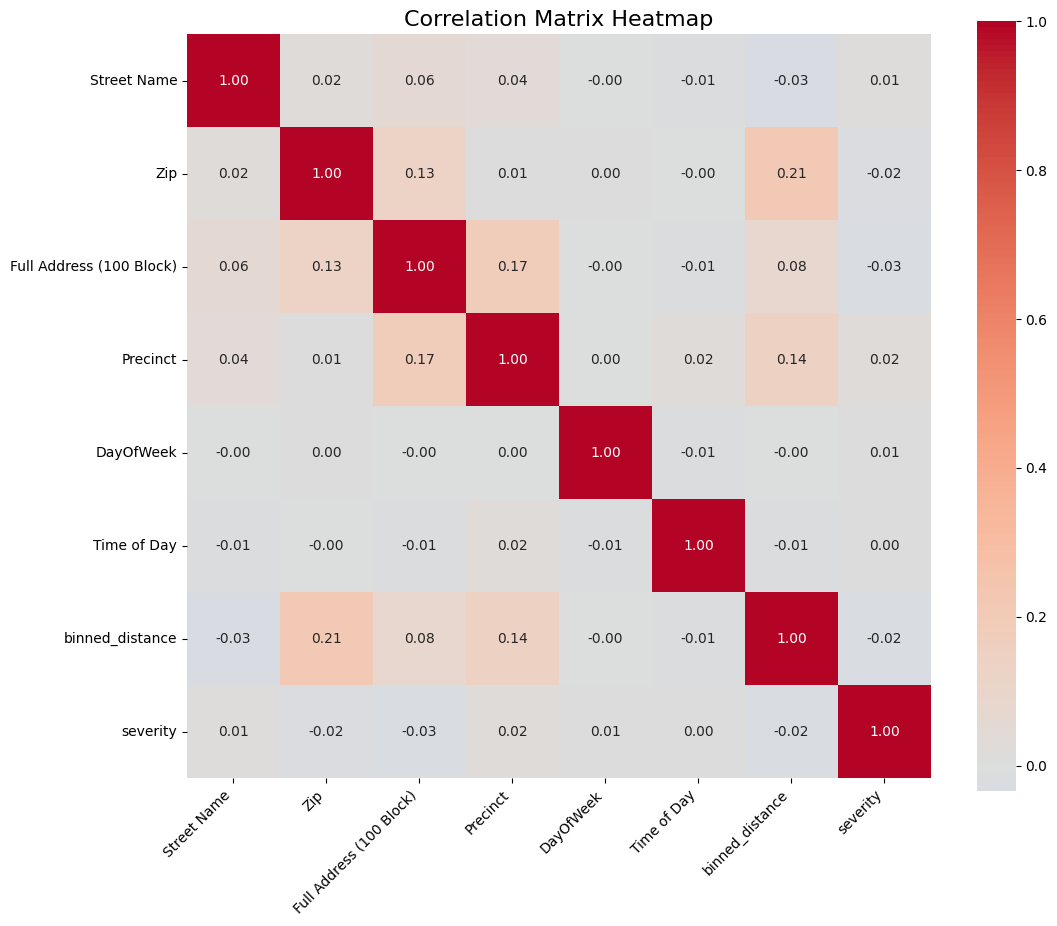

In [ ]:
categorical_features = data.select_dtypes(exclude=[np.number]).columns
df = data.copy()
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

categorical_features = categorical_features.tolist()
categorical_features.append('severity')

correlation_matrix = df[categorical_features].corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt=".2f"
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
correlations_with_target = correlation_matrix['severity'].sort_values(ascending=False)
print("Correlations of categorical features with severity:")
correlations_with_target


Correlations of categorical features with severity:


severity                    1.000000
Precinct                    0.024563
Street Name                 0.013853
DayOfWeek                   0.007892
Time of Day                 0.004578
Zip                        -0.020397
binned_distance            -0.022683
Full Address (100 Block)   -0.028322
Name: severity, dtype: float64

In [ ]:
cat_df = df[categorical_features]
cat_df = cat_df.reset_index(drop=True)
cat_df

,Street Name,Zip,Full Address (100 Block),Precinct,DayOfWeek,Time of Day,binned_distance,severity
0,19127,41,8906,13,1,3,4,1
1,20857,50,20119,8,3,1,3,1
2,20282,44,69002,20,1,2,3,1
3,28108,63,50498,11,1,3,3,2
4,15252,47,42352,23,4,0,3,1
...,...,...,...,...,...,...,...,...
639928,21089,42,27041,13,6,2,0,2
639929,26942,42,91491,18,2,0,0,2
639930,3404,41,89731,8,4,2,0,5
639931,17684,47,37249,23,1,1,3,3


# Model Training

In [ ]:
# Combine relevant numeric and categorical features
combined_df = pd.concat([num_df, cat_df], axis=1)
combined_df

,Lat,Long,Year,Month,Day,is_memphis,is_weekend,Street Name,Zip,Full Address (100 Block),Precinct,DayOfWeek,Time of Day,binned_distance,severity
0,0.597304,0.055338,0.0,0.181818,0.833333,1.0,0.0,19127,41,8906,13,1,3,4,1
1,0.658333,0.058409,0.0,0.090909,0.800000,1.0,1.0,20857,50,20119,8,3,1,3,1
2,0.639228,0.047226,0.0,0.545455,0.966667,1.0,0.0,20282,44,69002,20,1,2,3,1
3,0.692891,0.061229,0.0,0.636364,0.633333,1.0,0.0,28108,63,50498,11,1,3,3,2
4,0.673886,0.059882,0.0,0.727273,0.633333,1.0,0.0,15252,47,42352,23,4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639928,0.673673,0.057303,1.0,0.818182,0.266667,1.0,0.0,21089,42,27041,13,6,2,0,2
639929,0.666487,0.051685,1.0,0.909091,0.266667,1.0,1.0,26942,42,91491,18,2,0,0,2
639930,0.654510,0.051685,1.0,0.818182,0.066667,1.0,0.0,3404,41,89731,8,4,2,0,5
639931,0.666487,0.059551,1.0,0.818182,0.200000,1.0,0.0,17684,47,37249,23,1,1,3,3


In [ ]:
X = combined_df.drop(columns='severity')
y = df['severity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .75)

In [ ]:
def model_results(y_test, y_pred):
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    # Display the performance metrics
    print("\nClassification Report:")
    print(class_report)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)


In [ ]:
class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.num_classes = max(np.unique(y)) + 1

        # Initialize weights and bias
        self.weights = np.zeros((num_features, self.num_classes))
        self.bias = np.zeros(self.num_classes)

        # Convert y to one-hot encoded matrix
        y_onehot = np.eye(self.num_classes)[y]

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(z)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y_onehot))
            db = (1 / num_samples) * np.sum(y_pred - y_onehot, axis=0)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1)

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.softmax(z)


# Initialize and train model
model = MultinomialLogisticRegression(learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
model_results(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       432
           1       0.00      0.00      0.00     47788
           2       0.63      0.93      0.75     99930
           3       0.00      0.00      0.00      5390
           4       0.00      0.00      0.00       131
           5       0.00      0.00      0.00      3571
           7       0.00      0.00      0.00       147
           9       0.05      0.26      0.09      2595

    accuracy                           0.58    159984
   macro avg       0.09      0.15      0.10    159984
weighted avg       0.39      0.58      0.47    159984

Accuracy: 0.5846
Precision: 0.3934
Recall: 0.5846
F1 Score: 0.4698

Confusion Matrix:
[[    0     0   392     0     0     0     0    40]
 [    0     0 44119     0     0     0     0  3669]
 [    0     0 92860     0     0     0     0  7070]
 [    0     0  4882     0     0     0     0   508]
 [    0     0   122     0     0    